<a href="https://colab.research.google.com/github/soobba/DATA201-Project-1/blob/main/DATA_201_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction: Give the details on the source of your data, its content, and some questions you are interested in. The data should have at least 1000 rows and 4 columns.

In [47]:
data = pd.read_csv("Levels_Fyi_Salary_Data.csv")

### Our data is from Kaggle, which consists of 62,000 salary records from top companies. The dataset contains information such as education level, compensation (base salary, bonus, stock grants), race, and more. The original data set had 29 columns and 62,642 rows (see the below code).

# 2. Prepare and wrangle data with Pandas and Numpy

In [48]:
import pandas as pd
import numpy as np

In [49]:
data.shape

(62642, 29)

In [50]:
data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


# 3. Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Use at least two of the following depending on your question of interest: pairplot, histogram, barplot, boxplot, or scatterplot

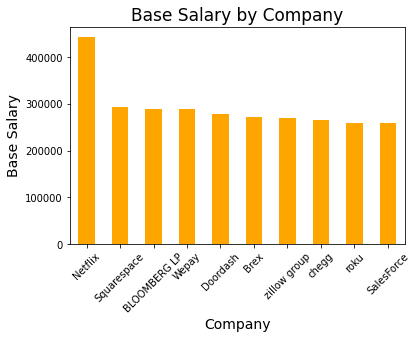

In [52]:
cgroup = data.groupby(['company']).mean()
cgroup.sort_values(by = 'basesalary', ascending = False).head(10)['basesalary'].plot(kind = 'bar', color = 'orange')
plt.title('Base Salary by Company', size = 17)
plt.xlabel('Company', size = 14)
plt.ylabel('Base Salary', size = 14)
plt.xticks(rotation = 45)
plt.show()

###After we generated this graph, we found out the top ten companies with the highest averaged base salary.

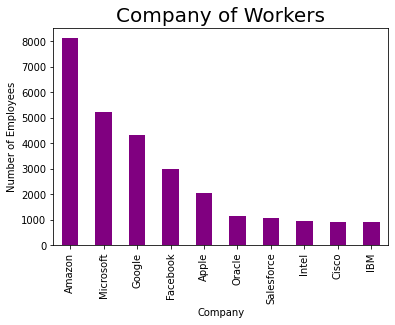

In [53]:
data['company'].value_counts().iloc[:10].plot(kind = 'bar', color = 'purple')
plt.title('Company of Workers', size = 20)
plt.xlabel('Company')
plt.ylabel('Number of Employees')
plt.show()

### We found the # of employees working at the ten companies mentioned above.

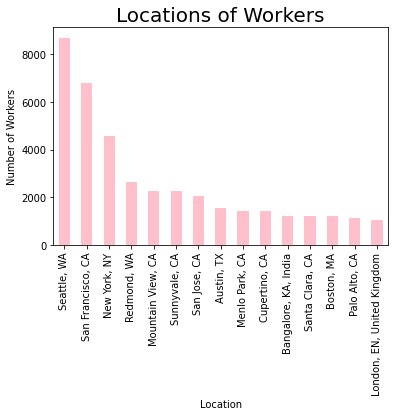

In [54]:
data['location'].value_counts().iloc[:15].plot(kind = 'bar', color = 'pink')
plt.title('Locations of Workers', size = 20)
plt.xlabel('Location')
plt.ylabel('Number of Workers')
plt.show()

### This graph shows how many STEM workers are located in the above locations.

In [55]:
data['gender'].unique()

array([nan, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

###We tried to graph a chart that shows the number of employees in the STEM field by gender. However, during the analysis, there was a catagory named "Title: Senior Software Engineer". There should've been only 'male' or 'female' categories. As such, we got rid of that "Title..." category.

In [56]:
# There is no 'Title: Senior software Engineer' gender, so we need to remove this.
data['gender'].replace('Title: Senior Software Engineer', np.nan, inplace = True)

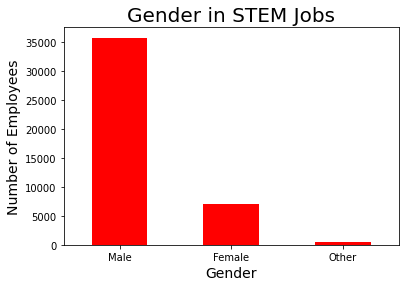

In [57]:
data['gender'].value_counts().plot(kind = 'bar', color = 'red')
plt.title('Gender in STEM Jobs', size = 20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Number of Employees', size = 14)
plt.xticks(rotation = 0)
plt.show()

###After we excluded the incorrect category, we generated the above bar graph.

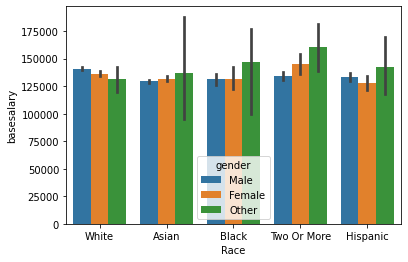

In [58]:
sns.barplot(x = 'Race', y = 'basesalary', hue = 'gender', data = data)

###The graph shows the base salary by race and by gender.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


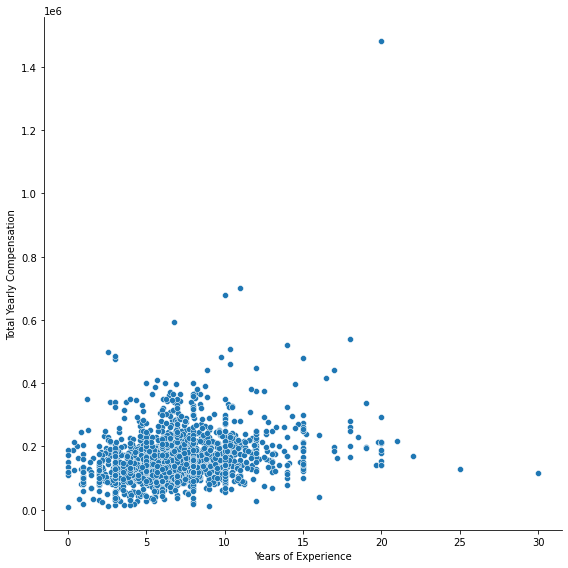

In [59]:
sns.pairplot(cgroup, x_vars = ['yearsofexperience'] , y_vars = ['totalyearlycompensation'], size = 8, kind = 'scatter')
plt.xlabel('Years of Experience')
plt.ylabel('Total Yearly Compensation')
plt.show()

###This is a scatterplot that shows the yearly total compensation by years of experience. From this graph, we can see the trend that the more experience usually leads to higher salary.

In [60]:
data['title'].unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Sales', 'Recruiter',
       'Mechanical Engineer', 'Management Consultant'], dtype=object)

In [61]:
F = data[data.gender == 'Female']

In [62]:
#FEMALE data subset by Title
F_SWE = F[F.title == 'Software Engineer']
F_TPM = F[F.title == 'Technical Program Manager']
F_PM = F[F.title == 'Product Manager']
F_Mar = F[F.title == 'Marketing']
F_SA = F[F.title == 'Solution Architect']
F_HWE = F[F.title == 'Hardware Engineer']
F_DS = F[F.title == 'Data Scientist']

###These are titles of female workers.

In [63]:
F_SWE_Mean = F_SWE.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_TPM_Mean = F_TPM.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_PM_Mean = F_TPM.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_Mar_Mean = F_Mar.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_SA_Mean = F_SA.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_HWE_Mean = F_HWE.groupby(['title', 'company', 'gender'], as_index = False).mean()
F_DS_Mean = F_DS.groupby(['title', 'company', 'gender'], as_index = False).mean()

In [64]:
M = data[data.gender == 'Male']

In [65]:
#MALE data subset by Title
M_SWE = M[M.title == 'Software Engineer']
M_TPM = M[M.title == 'Technical Program Manager']
M_PM = M[M.title == 'Product Manager']
M_Mar = M[M.title == 'Marketing']
M_SA = M[M.title == 'Solution Architect']
M_HWE = M[M.title == 'Hardware Engineer']
M_DS = M[M.title == 'Data Scientist']

### These are titles of male workers.

In [66]:
M_SWE_Mean = M_SWE.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_TPM_Mean = M_TPM.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_PM_Mean = M_TPM.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_Mar_Mean = M_Mar.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_SA_Mean = M_SA.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_HWE_Mean = M_HWE.groupby(['title', 'company', 'gender'], as_index = False).mean()
M_DS_Mean = M_DS.groupby(['title', 'company', 'gender'], as_index = False).mean()

In [67]:
F_mean_frames = F_SWE_Mean.append([F_TPM_Mean, F_PM_Mean, F_Mar_Mean, F_SA_Mean, F_HWE_Mean, F_DS_Mean])
M_mean_frames = M_SWE_Mean.append([M_TPM_Mean, M_PM_Mean, M_Mar_Mean, M_SA_Mean, M_HWE_Mean, M_DS_Mean])

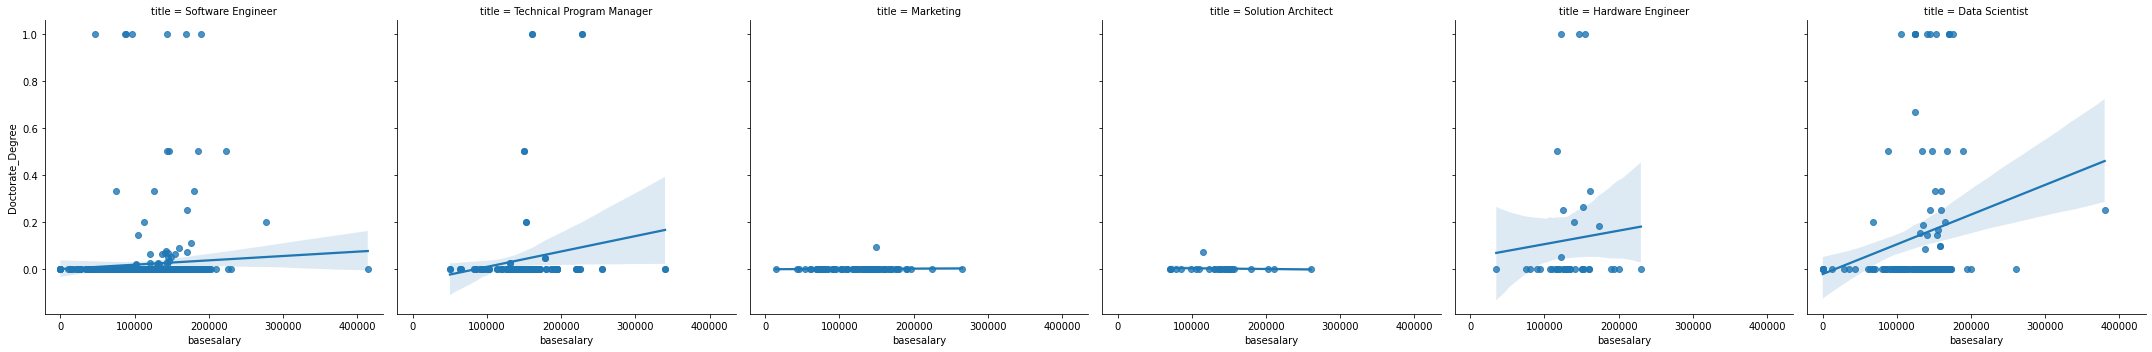

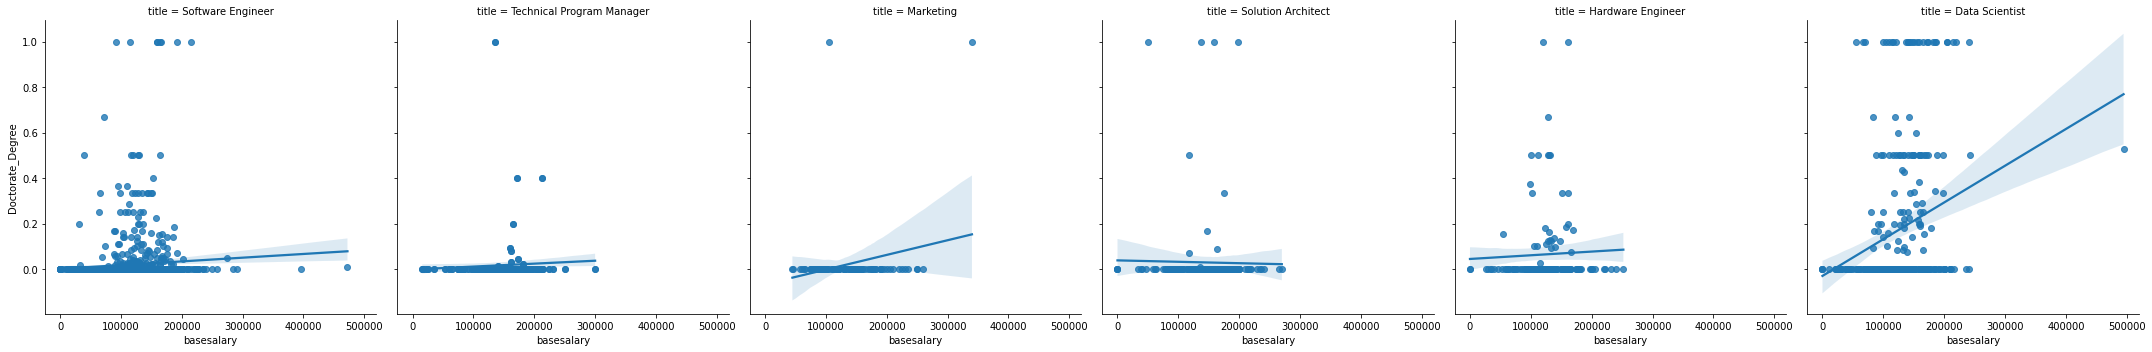

In [68]:
sns.lmplot(x = 'basesalary', y = 'Doctorate_Degree', data = F_mean_frames, col = 'title')
plt.show()

sns.lmplot(x = 'basesalary', y = 'Doctorate_Degree', data = M_mean_frames, col = 'title')
plt.show()

###We used 'lmplot' to draw a facet grid. This shows grids by different job titles. The first row looked at females, and the second row looked at males. Each grid shows the trend of base salary when you have/do not have a doctorate degree. From these graphs, we can infer that base salary increases with a doctorate degree.

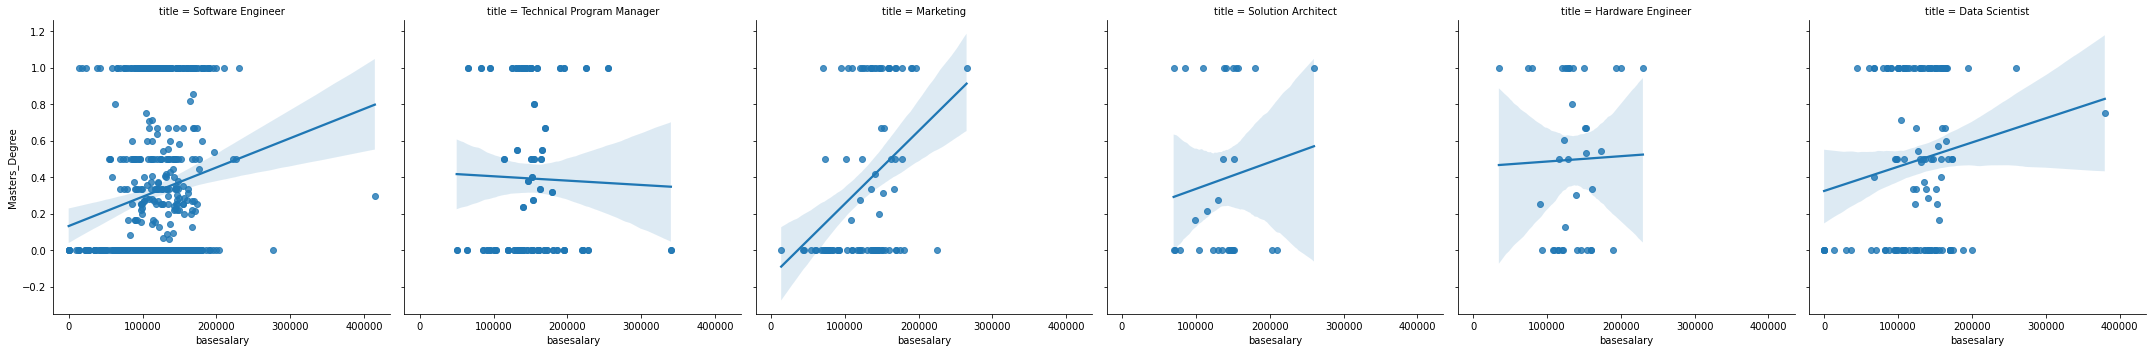

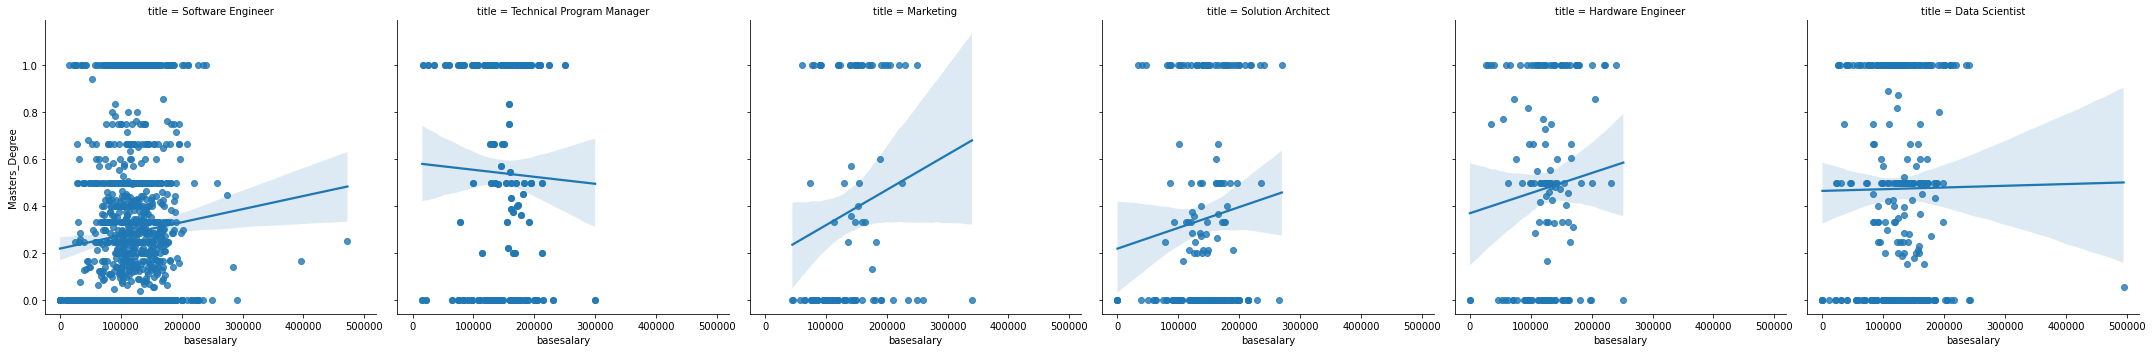

In [69]:
sns.lmplot(x = 'basesalary', y = 'Masters_Degree', data = F_mean_frames, col = 'title')
plt.show()

sns.lmplot(x = 'basesalary', y = 'Masters_Degree', data = M_mean_frames, col = 'title')
plt.show()

###The above facet grid shows the same information as before, but shows the trend of base salary depending on having a master's degree.

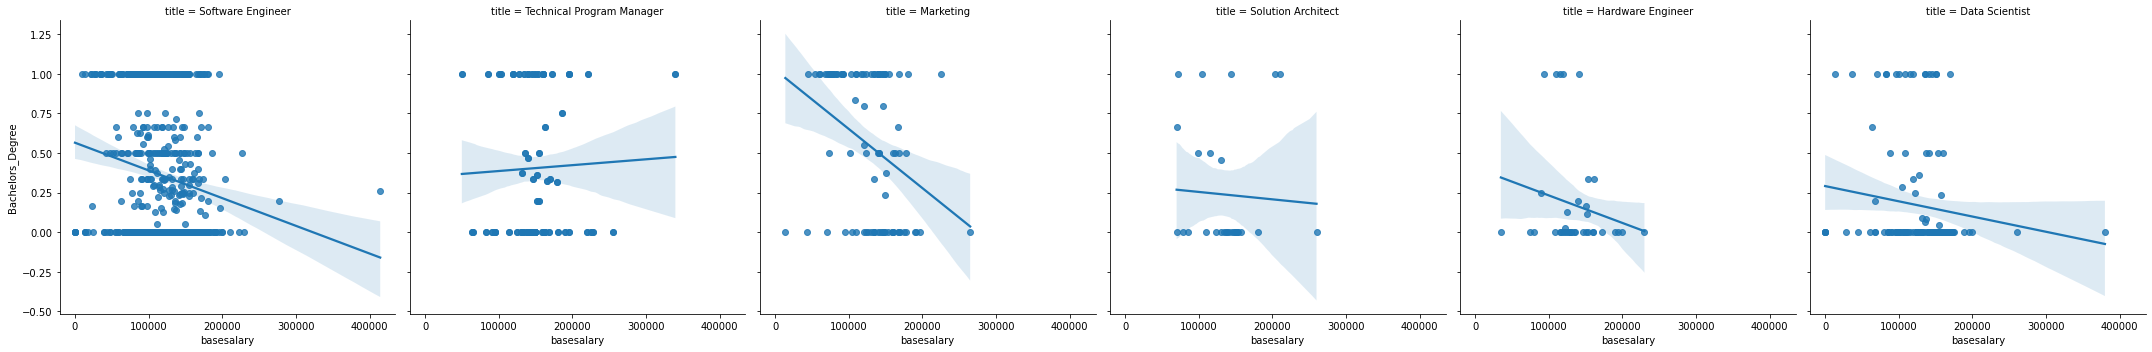

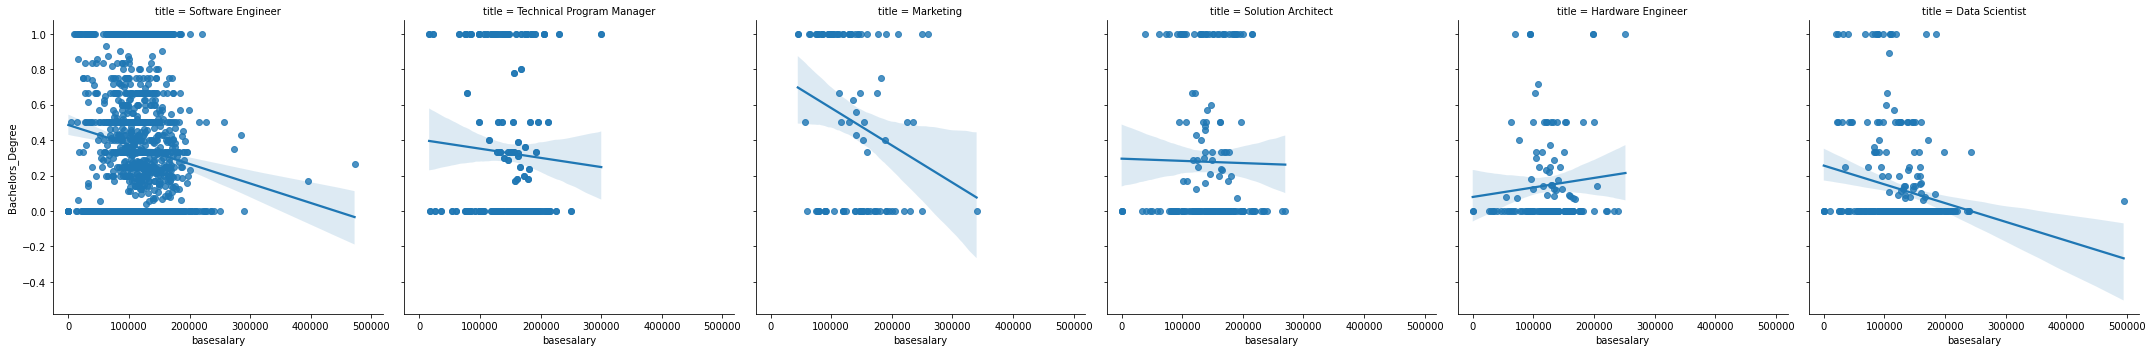

In [70]:
sns.lmplot(x = 'basesalary', y = 'Bachelors_Degree', data = F_mean_frames, col = 'title')
plt.show()

sns.lmplot(x = 'basesalary', y = 'Bachelors_Degree', data = M_mean_frames, col = 'title')
plt.show()

###The above graph uses bachelor's degree information.

# 5. Simulated Nonparametric Inference of the Median for Quantitative Variable - Base Salary

In [71]:
# median of base salary by race
data_racesalmed = data.groupby(['Race'], as_index = False)['basesalary'].median()
data_racesalmed.head()

,Race,basesalary
0,Asian,135000.0
1,Black,124000.0
2,Hispanic,130000.0
3,Two Or More,134000.0
4,White,138000.0


###The chart above shows the median of base salary by race. Note that the chart is sorted by alphabetic order of the race.

In [72]:
bootstrap = pd.DataFrame({'data': [data.sample(100, replace = True).basesalary.median() 
    for i in range (1000)
    ]})
bootstrap.head()

,data
0,143000.0
1,131500.0
2,130000.0
3,145000.0
4,136000.0


###We sampled 100 data from the dataset and assigned it to "bootstrap".

---



In [73]:
bootstrap.median()

data    140000.0
dtype: float64

In [74]:
data.basesalary.median()

140000.0

###Before moving further, we found that the median of the basesalary of the dataset is 140,000.

In [78]:
# Median Bootstrapping 2 - Sample 1000
bootstrap2 = pd.DataFrame({'data': [data.sample(1000, replace = True).basesalary.median() 
    for i in range (5000)
    ]})
bootstrap2.median()

data    140000.0
dtype: float64

### Next, we sampled 1,000 data and still found the median at 140,000.

In [77]:
# Median Bootstrapping 3 - Sample 5000
bootstrap3 = pd.DataFrame({'data': [data.sample(5000, replace = True).basesalary.median() 
    for i in range (5000)
    ]})
bootstrap3.median()

data    140000.0
dtype: float64

###Lastly, we sampled 5,000 data and still found the median at 140,000.

# 6. The sample size should be about 10% of the data. Use random sampling for the rows

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43101 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [81]:
# Median Bootstrapping 3 - Sample 10%: 6264.2
bootstrap_10pct = pd.DataFrame({'data': [data.sample(6264, replace = True).basesalary.median() for i in range (5000)]})
bootstrap_10pct.median()

data    140000.0
dtype: float64

###For the last part of the project, we sampled 10% of the data, which was 6,242 number of data.